In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle

#                               *IPL WIN PROBABILITY PREDICTION*            

# `Description`

<i>**In this Project, we will going to predict  the Winning and Losing Probability of Chasing Team in Ipl,
by determining the relevant features from the the give Datasets like current run rate,required run rate,wickets left,
runs left, balls left etc, and finally analyse the match progression by table formation and plots for loss, win probability ,wickets etc.** </i>

# `Table of Content`
**1-Importing Libraries**

**2-Data Preprocessing**

* Merging of Match and delivery dataframe
* Current Score
* Runs Left
* Balls Left
* Current Run Rate
* Required Run Rate
* Wickets
* Result
* Extraction of relevant features and getting final dataframe

**3-Data Cleaning**

* Dropping Null values
* Removing outrageous values from rrr col
* Shuffling of final df

**4-Model Building**

* Splitting of Training and Testing Data
* Column transformation using OHE
* Build Pipeling
* Predicting accuracy
* Predicting Probability score

**5-Analysis of Match Progression**

* Plots regarding match progression

**1-Importing Libraries**

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**2-Data Preprocessing**

In [5]:
match=pd.read_csv('matches.csv')
print(match.shape)
match.head()

(756, 18)


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
delivery=pd.read_csv('deliveries.csv')
print(delivery.shape)
delivery.head()

(179078, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
total_runs_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_runs_df.shape

(1528, 3)

In [8]:
total_runs_df=total_runs_df[total_runs_df['inning']==1]

In [9]:
match=match.merge(total_runs_df[['match_id','total_runs']],left_on='id',right_on='match_id')
print(match.shape)
match.head()

(756, 20)


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


In [10]:
# Total Match played by the teams
match['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [11]:
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
teams={'Sunrisers Hyderabad','Mumbai Indians','Royal Challengers Bangalore',
       'Chennai Super Kings','Delhi Capitals','Kings XI Punjab','Rajasthan Royals','Kolkata Knight Riders'}

In [13]:
match['team1']=match['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match['team2']=match['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

#Deccan chargers played most of the w.r.t old teams , as per the value_counts
match['team1']=match['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match['team2']=match['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [14]:
match=match[match['team1'].isin(teams)]
match=match[match['team2'].isin(teams)]

In [15]:
match.shape

(641, 20)

In [16]:
match['dl_applied'].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

In [17]:
match=match[match['dl_applied']==0]
match.shape

(626, 20)

In [18]:
match=match[['match_id','city','winner','total_runs']]
match.head()

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158


- **Merging of delivery and match df**

In [19]:
delivery=match.merge(delivery,on='match_id')
delivery.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [20]:
delivery.shape

(149578, 24)

In [21]:
#Extraction of 2nd innign data
delivery=delivery[delivery['inning']==2]
print(delivery.shape)
delivery.head()

(72413, 24)


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


- **Current Score**
- **Runs Left**

In [22]:
#find current score,runs_left
delivery['current_score']=delivery.groupby('match_id').cumsum()['total_runs_y']
delivery['runs_left']=delivery['total_runs_x']-delivery['current_score'] + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


- **Balls Left**

In [23]:
# Balls left
delivery['balls_left'] = 126 - (delivery['over']*6 + delivery['ball'])
delivery.head(7)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
130,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,11,197,114
131,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,0,0,0,NaN,NaN,NaN,11,197,113


- **Current Run Rate**
- **Required Run Rate**

In [24]:
#Current run rate,required run rate
delivery['crr']=(delivery['current_score']*6)/(120-delivery['balls_left'])
delivery['rrr']=round((delivery['runs_left']*6)/(delivery['balls_left']),3)
delivery.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,NaN,NaN,NaN,1,207,119,6.0,10.437
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,NaN,1,207,118,3.0,10.525


- **Wickets**

In [25]:
#wickets left
delivery['player_dismissed']=delivery['player_dismissed'].fillna('0')
delivery['player_dismissed']=delivery['player_dismissed'].apply(lambda x:x if x=='0' else '1')
delivery['player_dismissed']=delivery['player_dismissed'].astype('int')
wickets=delivery.groupby('match_id').cumsum()['player_dismissed'].values
delivery['wickets_left']=10-wickets


- **Result**

In [26]:
#Result
def result(row):
    if row['batting_team']==row['winner']:
        return 1
    else:
        return 0

In [27]:
delivery['result']=delivery.apply(result,axis=1)
delivery.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,crr,rrr,wickets_left,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,207,119,6.0,10.437,10,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,207,118,3.0,10.525,10,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,1,207,117,2.0,10.615,10,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,3,205,116,4.5,10.603,10,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,7,201,115,8.4,10.487,10,0


- **Extraction of Relevant features and getting final Dataframe**

In [28]:
#Extracting out relevent features from delivery dataframe
final_df=delivery[['batting_team','bowling_team','city','runs_left','balls_left',
                   'total_runs_x','crr','rrr','wickets_left','result']]

**3-Data Cleaning**

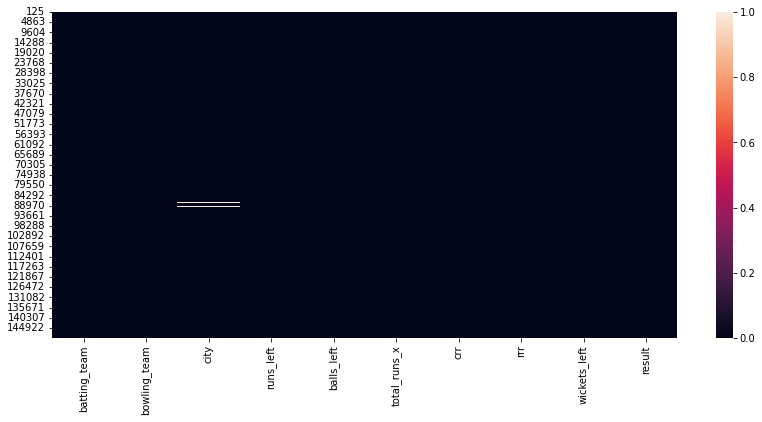

In [29]:
#Determining and removing null values
plt.figure(figsize=(14,6))
sns.heatmap(final_df.isnull())
plt.show()

In [30]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
total_runs_x      0
crr               0
rrr               5
wickets_left      0
result            0
dtype: int64

- **Drop Null Values**

In [31]:

final_df.dropna(inplace=True)
final_df.shape

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(71576, 10)

- **Removal of Outrageous values from rrr col**

In [32]:

final_df=final_df[final_df['balls_left']!=0]
print(final_df['rrr'].describe())
final_df.shape

count    71342.000000
mean        10.568474
std         14.041845
min       -516.000000
25%          7.268000
50%          9.000000
75%         11.032000
max        684.000000
Name: rrr, dtype: float64


(71342, 10)

- **Shuffing of final DataFrame**

In [33]:

final_df=final_df.sample(final_df.shape[0])
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,total_runs_x,crr,rrr,wickets_left,result
6028,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,84,51,167,7.304348,9.882,7,0
92408,Kolkata Knight Riders,Rajasthan Royals,Ahmedabad,167,116,170,6.000000,8.638,10,0
24757,Kolkata Knight Riders,Mumbai Indians,East London,86,57,148,6.000000,9.053,8,0
57097,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,49,62,128,8.275862,4.742,9,1
128160,Delhi Daredevils,Chennai Super Kings,Pune,218,119,218,6.000000,10.992,10,0


**4- Model Building**

- **Splitting of Training and Testing Data**

In [34]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [35]:
#shape of X_train ,y_train
print(X_train.shape)
print(y_train.shape)

(57073, 9)
(57073,)


In [36]:
X_train.head()

,batting_team,bowling_team,city,runs_left,balls_left,total_runs_x,crr,rrr,wickets_left
59652,Kolkata Knight Riders,Rajasthan Royals,Jaipur,130,76,164,4.772727,10.263,6
116355,Mumbai Indians,Delhi Daredevils,Delhi,93,64,164,7.714286,8.719,8
69784,Mumbai Indians,Kolkata Knight Riders,Mumbai,103,74,140,4.956522,8.351,9
108100,Rajasthan Royals,Mumbai Indians,Mumbai,55,27,187,8.580645,12.222,7
27365,Delhi Daredevils,Mumbai Indians,East London,97,100,116,6.000000,5.820,10


- **Column transformation using One Hot Encoding**

In [37]:
#Categorical Columns transformation using One Hot Encoding
trf=ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

- **Build Pipeline**

In [38]:
#PipeLine formation
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

- **Prediction and find accuracy**

In [39]:
#Prediction
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.8016679515032588

In [40]:
pickle.dump(pipe, open('pipe.pkl', 'wb'))

- **Probability Prediction**

In [41]:
pipe.predict_proba(X_test)[0]

array([0.33517562, 0.66482438])

In [42]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,total_runs_x,crr,rrr,wickets_left,result
6028,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,84,51,167,7.304348,9.882,7,0
92408,Kolkata Knight Riders,Rajasthan Royals,Ahmedabad,167,116,170,6.000000,8.638,10,0
24757,Kolkata Knight Riders,Mumbai Indians,East London,86,57,148,6.000000,9.053,8,0
57097,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,49,62,128,8.275862,4.742,9,1
128160,Delhi Daredevils,Chennai Super Kings,Pune,218,119,218,6.000000,10.992,10,0


**5-Analysis of Match Progression**

In [43]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','total_runs_x','crr','rrr','wickets_left']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose_proba'] = np.round(result.T[0]*100,1)
    temp_df['win_proba'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    batting_team=temp_df['batting_team'].values[0]
    bowling_team=temp_df['bowling_team'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    #wickets = list(temp_df['wickets'].values)
    #new_wickets = wickets[:]
    #new_wickets.insert(0,10)
    #wickets.append(0)
    #w = np.array(wickets)
    #nw = np.array(new_wickets)
    #temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    print('Batting_team:- ',batting_team)
    print('Bowling_team:- ',bowling_team)
    print("Target-",target)
    
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_left','lose_proba','win_proba']]
    return temp_df,target

In [44]:
temp_df,target=match_progression(delivery,1,pipe)
temp_df

Batting_team:-  Royal Challengers Bangalore
Bowling_team:-  Sunrisers Hyderabad
Target- 207


,end_of_over,runs_after_over,wickets_left,lose_proba,win_proba
130,1,10,10,88.6,11.4
136,2,1,10,91.9,8.1
142,3,16,10,84.4,15.6
148,4,11,10,78.9,21.1
155,5,5,10,79.4,20.6
162,6,10,9,84.4,15.6
168,7,7,8,90.2,9.8
174,8,13,8,85.0,15.0
180,9,10,8,80.8,19.2
187,10,10,8,75.9,24.1


- **Plots**

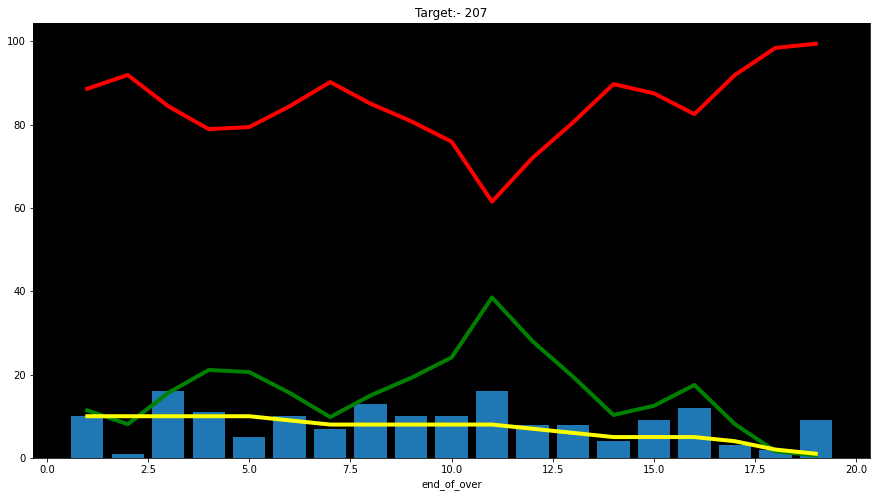

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(temp_df['end_of_over'],temp_df['lose_proba'],color='red',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['win_proba'],color='green',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['wickets_left'],color='yellow',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.xlabel('end_of_over')
plt.title('Target:- '+ str(target))
plt.show()

<span style="color:crimson;"> **If you find this notebook useful , please upvote ,  bcz it would be a great confidence booster for me as a beginner , and also  I'll focus on  doing  the next project with more enthusiasm.**   </span> 